In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


data = pd.read_csv("D:\Walmart_Sales.csv")
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [74]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [76]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [77]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [78]:
#object to float
data['Date'] = pd.to_numeric(data['Date'], errors='coerce')
# Convert date column to numerical representation 
data['Date'] = pd.to_datetime(data['Date']).astype('int64') / 10**9


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   float64
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 402.3 KB


In [80]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [81]:

ndata=data[['Store','Date','Weekly_Sales','Holiday_Flag','CPI']]
ndata.head()

,Store,Date,Weekly_Sales,Holiday_Flag,CPI
0,1,-9.223372e+09,1643690.90,0,211.096358
1,1,-9.223372e+09,1641957.44,1,211.242170
2,1,-9.223372e+09,1611968.17,0,211.289143
3,1,-9.223372e+09,1409727.59,0,211.319643
4,1,-9.223372e+09,1554806.68,0,211.350143


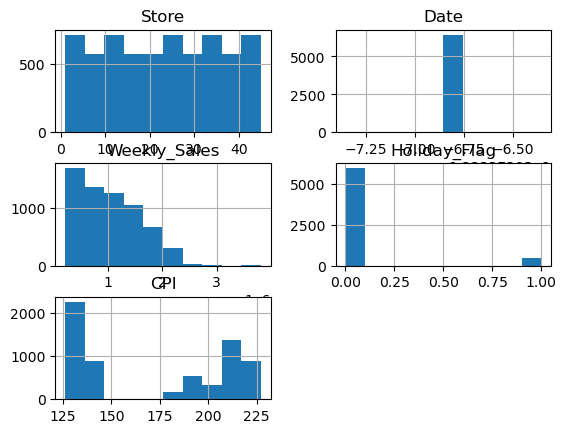

In [82]:
#Visualization
#histogram
viz = ndata[['Store','Date','Weekly_Sales','Holiday_Flag','CPI']]
viz.hist()
plt.show()

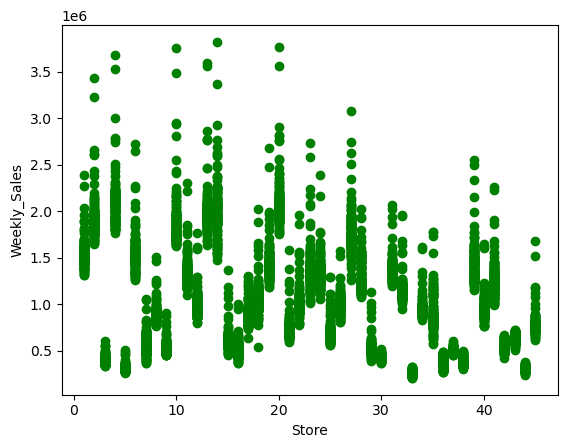

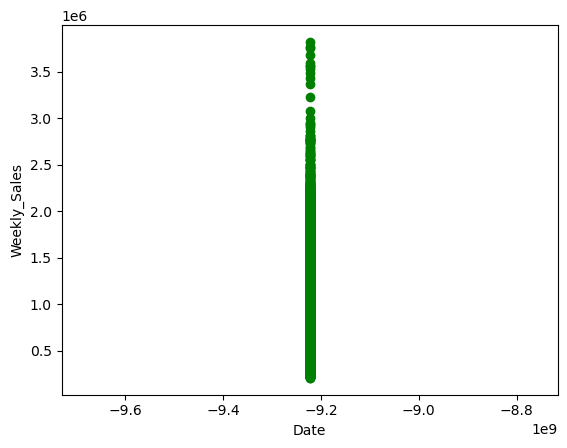

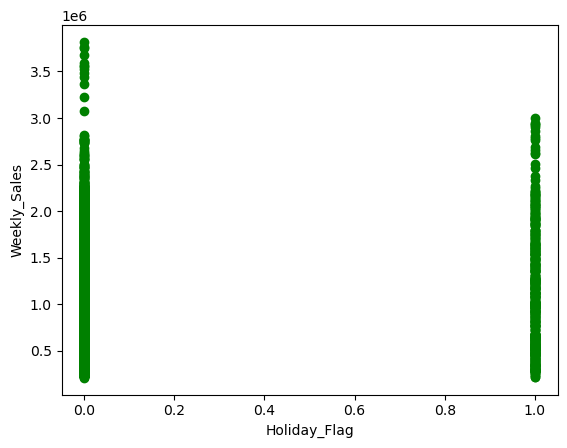

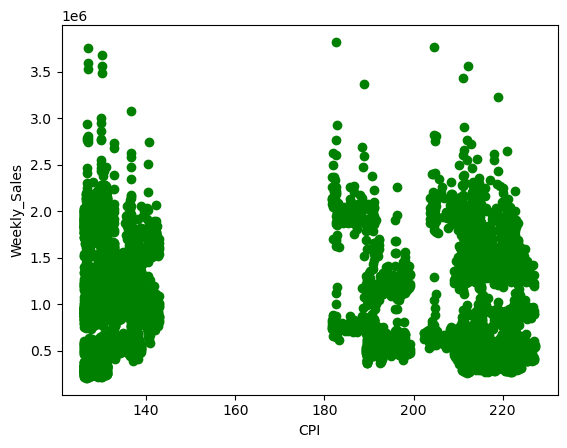

In [83]:
#scatter plot
for i in ndata[['Store','Date','Holiday_Flag','CPI']]:
    plt.scatter(ndata[i],ndata['Weekly_Sales'],color='green')
    plt.xlabel(i)
    plt.ylabel("Weekly_Sales")
    plt.show()


Text(0.5, 1.0, 'Distribution of Weekly Sales')

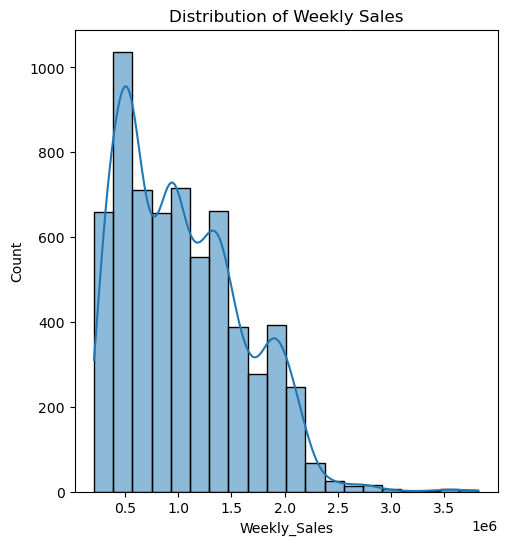

In [84]:
#histgram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(ndata['Weekly_Sales'], bins=20, kde=True)
plt.title('Distribution of Weekly Sales')

Text(0.5, 0, 'Weekly Sales')

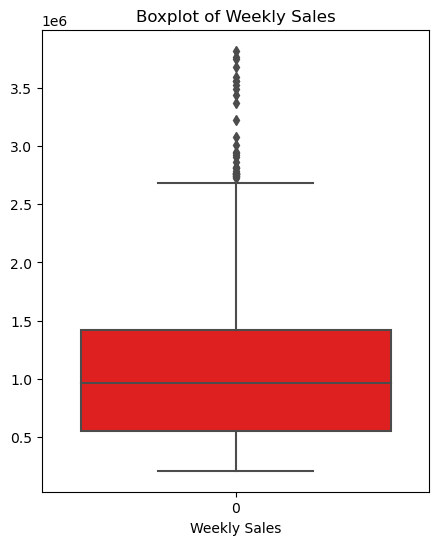

In [85]:
#boxplot
plt.figure(figsize=(5, 6))
sns.boxplot(ndata['Weekly_Sales'], color='red')
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Weekly Sales')


In [86]:
#preparing the data 
# x and y Features
X = data[['Date','Store', 'Fuel_Price','CPI']]  
y = data['Weekly_Sales']


In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
#build model 
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [89]:
#make predictions 
y_pred = model.predict(X_test)

In [90]:
#evaluation
#finding Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 275788220815.3611


In [91]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 525155.4253888662


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [92]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 434617.00260962656


In [93]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2 Score):", r2)

R-squared (R2 Score): 0.14392577013796892


In [94]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [     0.         -15707.73626386  -5038.60137214  -2077.47983658]
Intercept: 1781601.1174337873


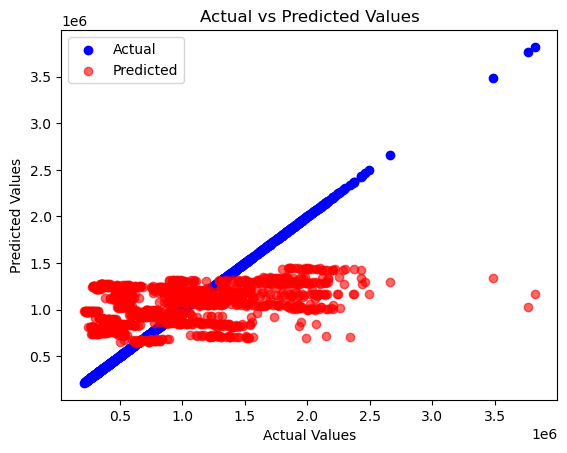

In [96]:
#visualizing the results 
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()
